In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [9]:
N_queries = 10

Ls = [0, 3, 9, 27] #number of neighbors to make candidates
bs = [200] #hash bits
es = [4, 2.7, 2.3, 2.0, 1.8] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [0, 3, 9, 27]
bs, [200]
es, [4, 2.7, 2.3, 2.0, 1.8]
Ms, [17, 37, 53, 74, 95]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    17,     0,    0.997,    0.750
     0,      0,      1,   200,   4.0,    17,     3,    1.101,    0.875
     0,      0,      2,   200,   4.0,    17,     9,    1.880,    0.908
     0,      0,      3,   200,   4.0,    17,    27,    3.219,    0.947
     0,      1,      0,   200,   2.7,    37,     0,    1.495,    0.818
     0,      1,      1,   200,   2.7,    37,     3,    3.289,    0.916
     0,      1,      2,   200,   2.7,    37,     9,    3.324,    0.942
     0,      1,      3,   200,   2.7,    37,    27,    7.014,    0.967
     0,      2,      0,   200,   2.3,    53,     0,    2.429,    0.818
     0,      2,      1,   200,   2.3,    53,     3,    2.300,    0.918
     0,      2,      2,   200,   2.3,    53,     9,    3.735,    0.957
     0,      2,      3,   200,   2.3, 

Optimal points
  b,   e,  M,  L,    t,  ndgc
200, 4.0, 17,  0, 0.63, 0.722
200, 4.0, 17, 16, 2.21, 0.921
200, 2.7, 37,  0, 1.32, 0.790
200, 2.7, 37,  4, 1.62, 0.896
200, 2.1, 66,  4, 3.72, 0.937
200, 2.1, 66, 16, 7.72, 0.974
200, 1.8, 95,  0, 3.91, 0.841
200, 1.8, 95, 64,32.26, 0.994
200, 1.6,128,  0, 4.73, 0.878
200, 1.6,128, 16,14.84, 0.987


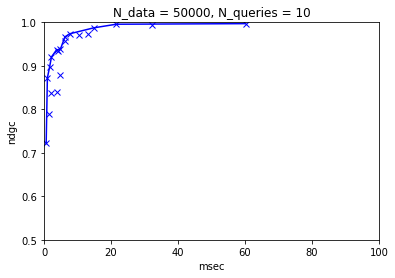

In [8]:
axlims = [0, 100, 0.5, 1]
idxs = plot_search(results, N_data, N_queries, axlims)

# Vary b

In [ ]:
N_queries = 10

bs = range(5, 250, 20)
es = [4, 2] #error tolerance
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

In [ ]:
plot_param_search(results, 0, N_data, N_queries)

# Vary eps

In [ ]:
N_queries = 200

bs = [200]
es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5, 1.3, 1.0]
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

In [ ]:
plot_param_search(results, 1, N_data, N_queries)

# Vary L

In [ ]:
N_queries = 200

bs = [200]
es = [4, 2] #error tolerance
Ls = range(0, 20, 1) #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

In [ ]:
plot_param_search(results, 2, N_data, N_queries)